In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
plt.ioff()

results = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/temporary_22082023.pkl", "rb"))

In [25]:
result = results[0.4]
result

{'loss_e_fracs': tensor([0.3069, 0.0651, 0.0651,  ..., 0.0813, 0.0775, 0.0813]),
 'loss_e_fracs_true': tensor([0.3069, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]),
 'betas': [array([[0.10064339],
         [0.7356693 ],
         [0.11448259],
         ...,
         [0.1143484 ],
         [0.03139034],
         [0.17515062]], dtype=float32),
  array([[0.12074164],
         [0.11791695],
         [0.11856029],
         ...,
         [0.14070418],
         [0.1262906 ],
         [0.15226291]], dtype=float32),
  array([[0.02606011],
         [0.10264876],
         [0.14156535],
         ...,
         [0.0015785 ],
         [0.00250692],
         [0.00039311]], dtype=float32),
  array([[0.7697873 ],
         [0.1194346 ],
         [0.11328719],
         ...,
         [0.13828363],
         [0.14150217],
         [0.1369106 ]], dtype=float32)],
 'part_E_true': tensor([ 3.7033, 39.3302, 39.3302,  ..., 10.5850,  1.1970, 10.5850]),
 'part_PID_true': tensor([ -211,   130,   130,  ...,  2112, -

In [26]:
result.keys()

dict_keys(['loss_e_fracs', 'loss_e_fracs_true', 'betas', 'part_E_true', 'part_PID_true'])

In [27]:
result["loss_e_fracs"].shape

torch.Size([1043])

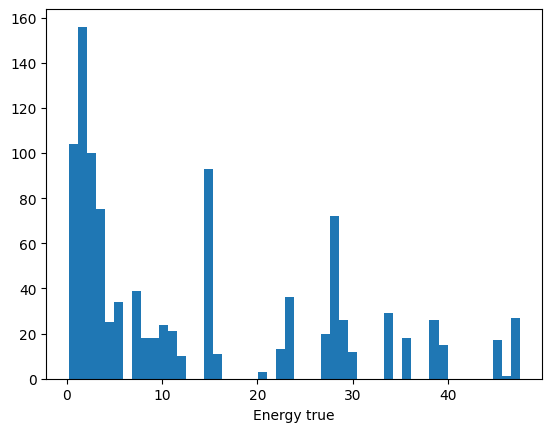

In [28]:
fig, ax = plt.subplots()

ax.hist(result["part_E_true"], bins=50,label="Energy true")
ax.set_xlabel("Energy true")
fig.show()


In [29]:
result["part_E_true"].max().item(), result["part_E_true"].min().item()

(47.5018310546875, 0.21728888154029846)

In [30]:
ranges = [(0.2, 1), (1, 10), (10, 50)]

In [32]:
e_frac_per_pid_and_range = {}
for pid in result["part_PID_true"].unique():
    e_frac_per_pid_and_range[pid] = {}
    for r in ranges:
        e_frac_per_pid_and_range[pid][r] = []
        idx = [i for i, x in enumerate(result["part_PID_true"]) if x == pid and result["part_E_true"][i] > r[0] and result["part_E_true"][i] <= r[1]]
        e_frac_per_pid_and_range[pid][r] = result["loss_e_fracs"][idx]
num_pids, num_ranges = len(e_frac_per_pid_and_range.keys()), len(ranges)

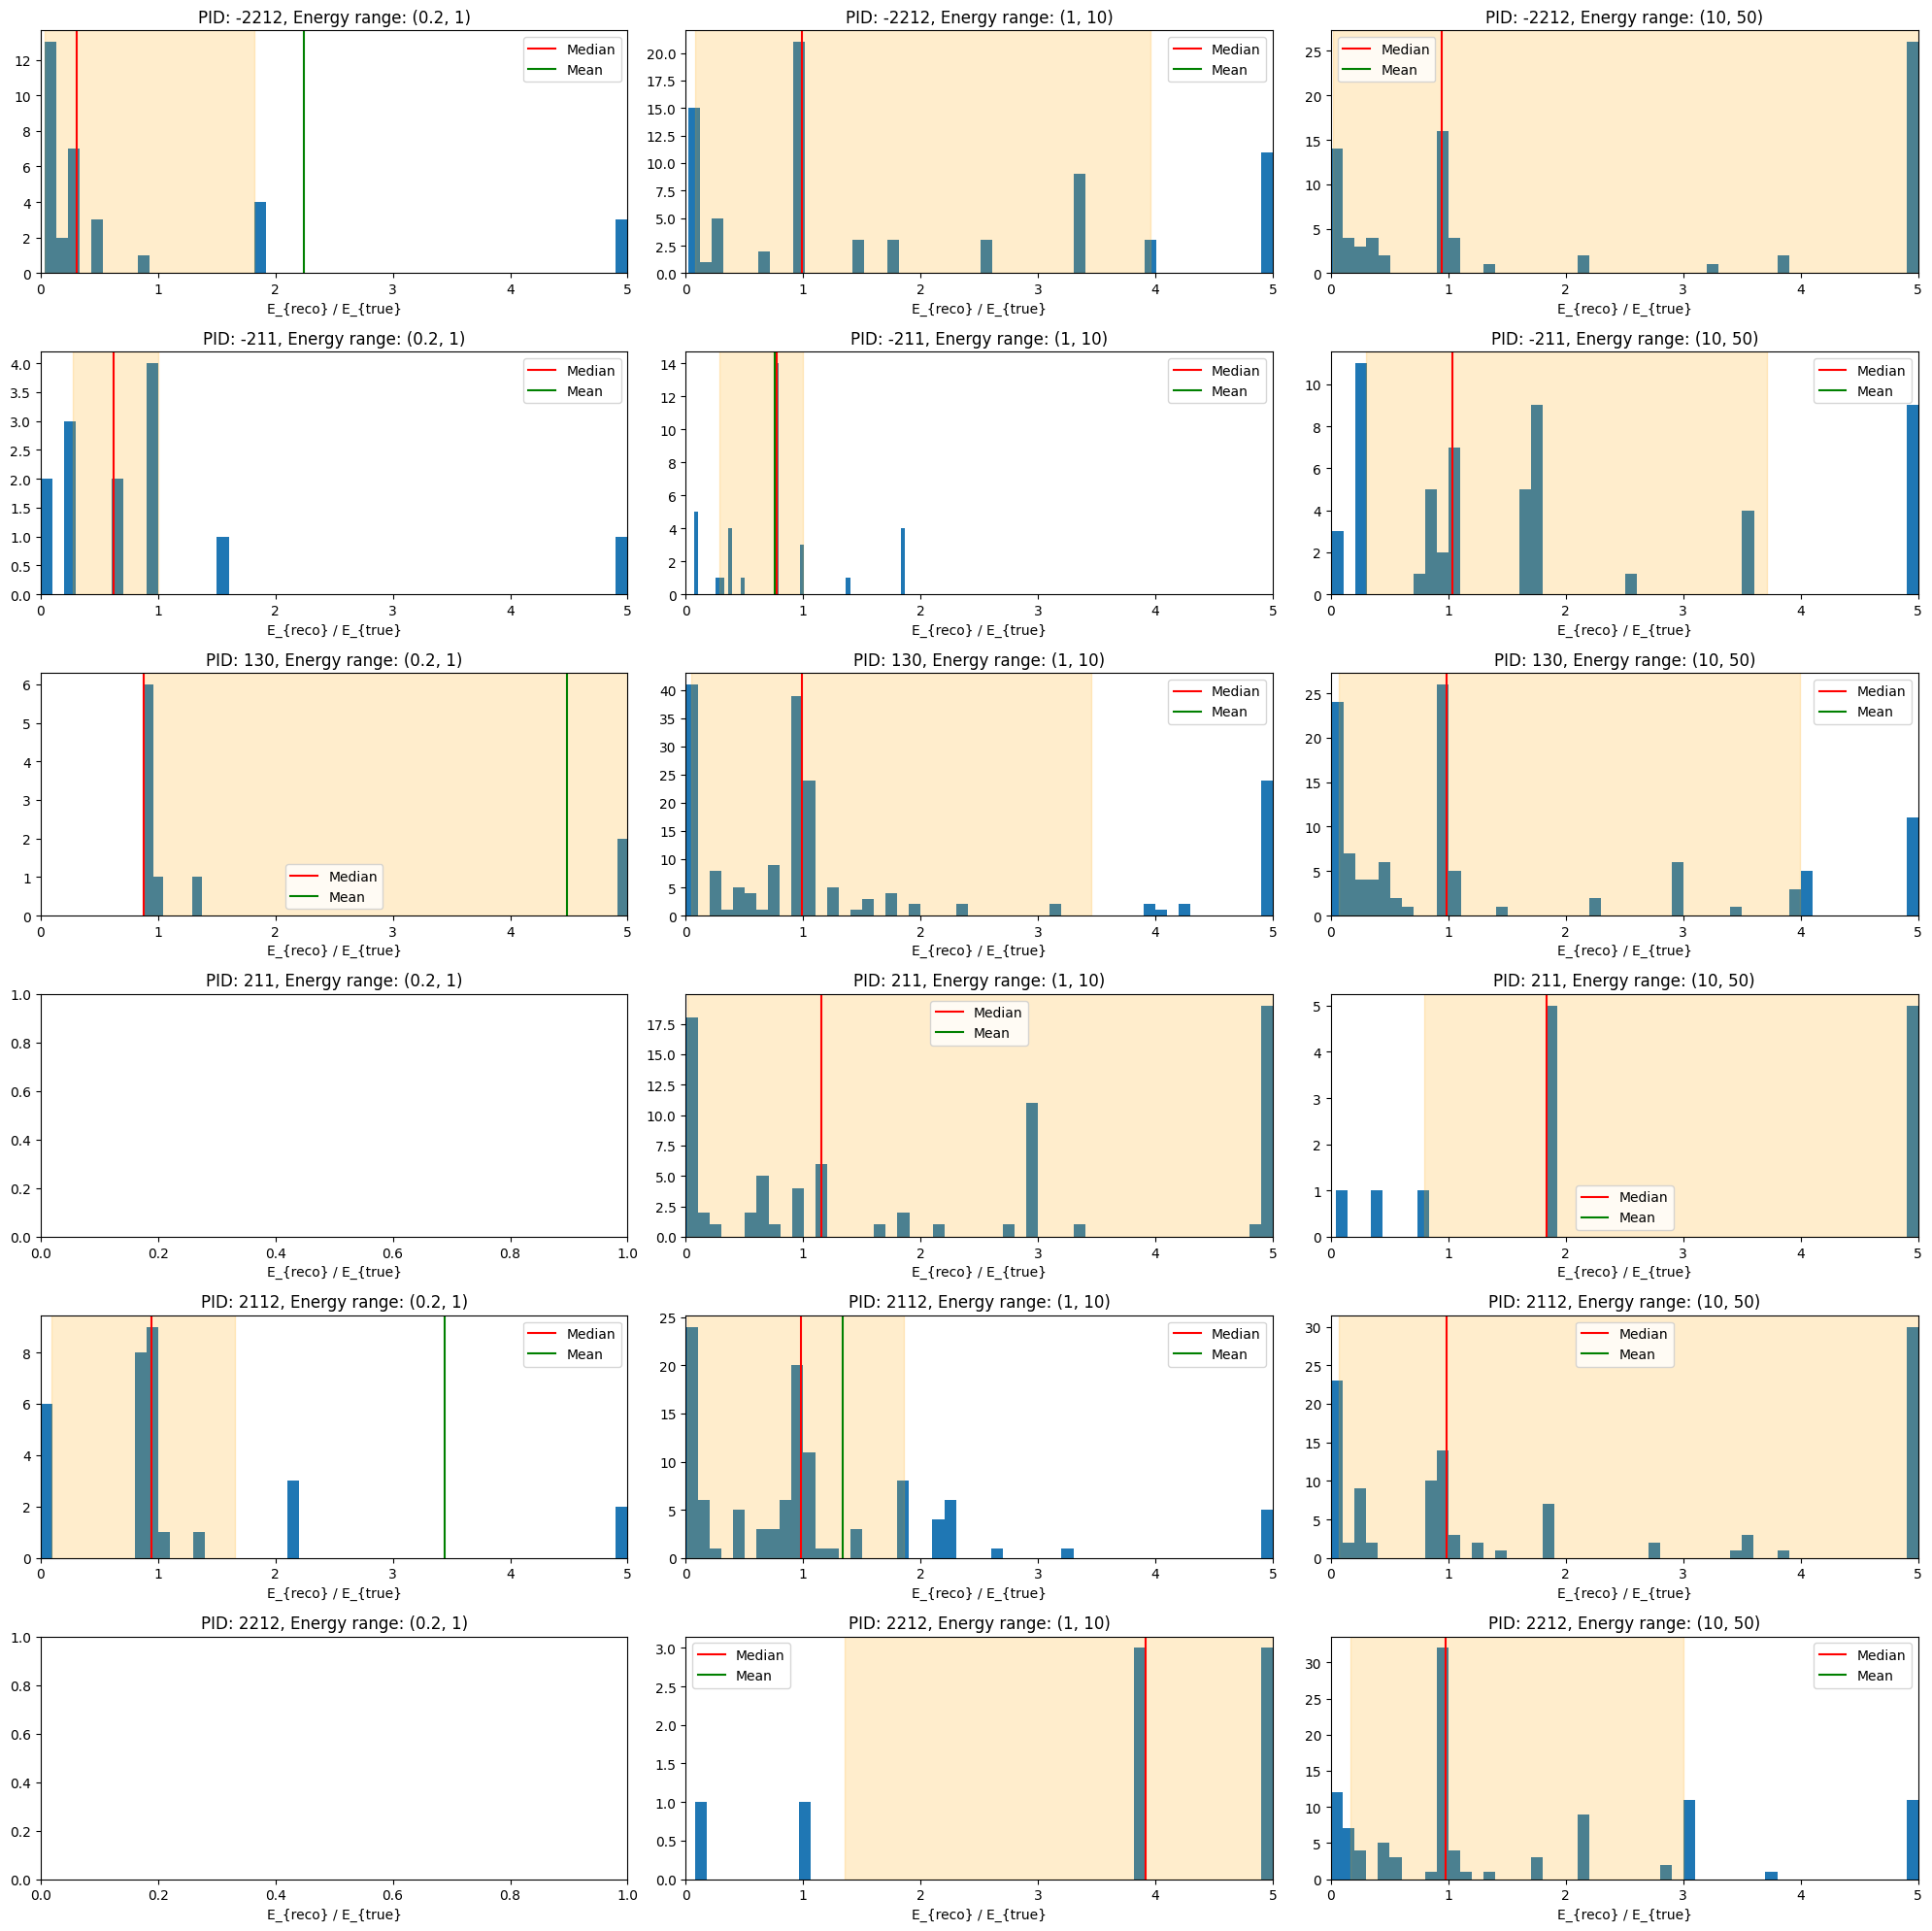

In [69]:
fig, ax = plt.subplots(num_pids, num_ranges, figsize=(20, 20))
intervals = {}
def clip(data, n):
    return [x if x < n else n for x in data]

for i, pid in enumerate(e_frac_per_pid_and_range.keys()):
    for j, r in enumerate(ranges):
        data = e_frac_per_pid_and_range[pid][r]
        if len(data):
            median, mean = data.median(), data.mean()
            interval_68 = (np.percentile(data, 16), np.percentile(data, 84))
            data = clip(data, 5)
            ax[i, j].hist(data, bins=50, label="")
            ax[i, j].set_xlim([0, 5])
            ax[i, j].axvline(median, color="red", label="Median")
            ax[i, j].axvline(mean, color="green", label="Mean")
            #ax[i, j].axvline(interval_68[0], color="orange", label="68% interval")
            #ax[i, j].axvline(interval_68[1], color="orange")
            # shaded 68% interval
            ax[i, j].axvspan(interval_68[0], interval_68[1], 0, 5, color="orange", alpha=0.2)
            intervals[(pid, r)] = interval_68
            ax[i, j].legend()
        ax[i, j].set_xlabel("E_{reco} / E_{true}")
        ax[i, j].set_title(f"PID: {pid}, Energy range: {r}")


fig.tight_layout()
fig.show()

In [58]:
result["part_PID_true"]

tensor([ -211,   130,   130,  ...,  2112, -2212,  2112])

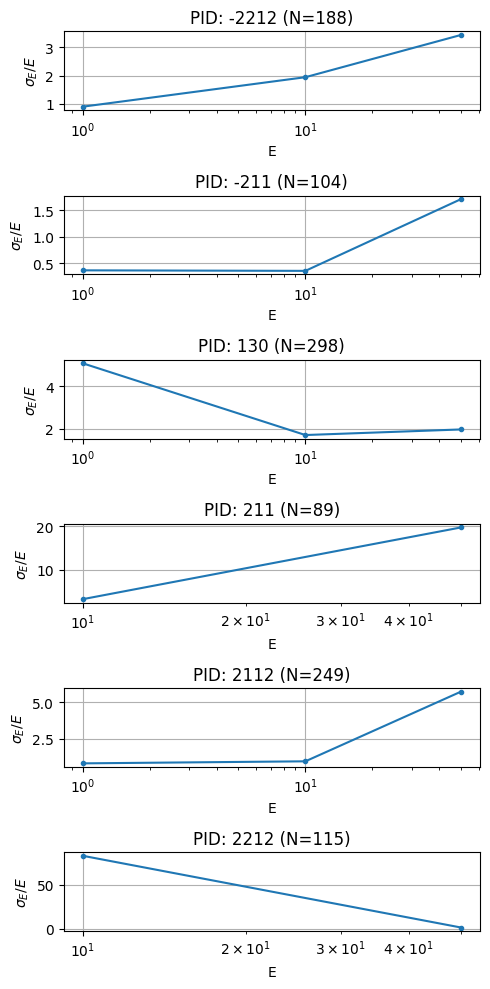

In [68]:
fig, ax = plt.subplots(num_pids, 1, figsize=(5, 10))
for i, pid in enumerate(e_frac_per_pid_and_range.keys()):
    sigmas, energies = [], []
    #sigmas = [intervals[(pid, r)] for r in ranges]
    #energies = [r[1] for r in ranges]
    for j in range(len(ranges)):
        if (pid, ranges[j]) in intervals:
            sigmas.append((intervals[(pid, ranges[j])][1] - intervals[(pid, ranges[j])][0]) / 2)
            energies.append(ranges[j][1])
    ax[i].plot(energies, sigmas, ".-")
    ax[i].set_xlabel("E")
    ax[i].set_ylabel("$\sigma_E/E$")
    ax[i].set_title(f"PID: {pid} (N={sum(result['part_PID_true'] == pid)})")
    ax[i].set_xscale("log")
    ax[i].grid()
fig.tight_layout()
fig.show()



In [60]:
intervals

{(tensor(-2212), (0.2, 1)): (0.03408333659172058, 1.8248244524002075),
 (tensor(-2212), (1, 10)): (0.07746008783578873, 3.960676431655884),
 (tensor(-2212), (10, 50)): (0.02087283693253994, 6.902542591094971),
 (tensor(-211), (0.2, 1)): (0.27558054924011227, 1.0065660238265992),
 (tensor(-211), (1, 10)): (0.2857782876491547, 0.9968024492263794),
 (tensor(-211), (10, 50)): (0.3019655644893646, 3.716999225616452),
 (tensor(130), (0.2, 1)): (0.8803144097328186, 11.012894363403314),
 (tensor(130), (1, 10)): (0.04379716515541077, 3.452205610275258),
 (tensor(130), (10, 50)): (0.06514967232942581, 3.996696710586548),
 (tensor(211), (1, 10)): (0.016429195180535316, 6.452014446258545),
 (tensor(211), (10, 50)): (0.797458517551422, 40.238094329833984),
 (tensor(2112), (0.2, 1)): (0.09033625572919846, 1.6576809597015376),
 (tensor(2112), (1, 10)): (0.01149043533951044, 1.8619080781936646),
 (tensor(2112), (10, 50)): (0.06557975411415101, 11.54872989654541),
 (tensor(2212), (1, 10)): (1.349515578